In [64]:
import string
import numpy as np

In [65]:
phrase = "To be, or not to be, that is the question"

In [66]:
phrase_list = [i for i in phrase]

In [67]:
def generate_random_individual(size):
    phrase = ''
    for letter in range(size):
        binary_letter_string = ''
        for j in [str(np.random.randint(0,2)) for i in range(7)]:
            binary_letter_string = binary_letter_string + j
        phrase = phrase + binary_letter_string
    return phrase

In [68]:
individual = generate_random_individual(len(phrase))
individual

'00001000001110010010001010101110111001110010011100100110100100101111001000100001010010011101111111010100110001101011101001111100101101101100111010001011011111101011101101011111111101100010101100110010101010110101001000001100100100111011101011001101010100111001101110010001000010010100001'

In [69]:
all_letters = string.printable[0:95]
all_letters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [70]:
#The scaler does not limit the max value,
#Instead it map the possible values in 
#The binary string 1111111 from [0, 127] to [0, 94]
#If we use a binary string 11111111 for ex [0, 255]
#The result would be 189 and we must clamp it if needed
#scale(int('11111111', 2))
# -> 189
def scale(value, new_min = 0, new_max = 94, old_max = 127):
    return np.round(((value - 0) / (old_max - 0)) * (new_max - new_min) + new_min)

In [71]:
def decode_binary_to_phrase(individual):
    phrase = ""
    for pos in range(0, len(individual), 7):
        binary_letter = str(individual[pos: pos+7])
        #if int(binary_letter, 2) > 94:
        #    int_value = 94
        #else:
        #    int_value = int(binary_letter, 2)
        
        int_value = int(scale(int(binary_letter, 2)))
        
        letter = all_letters[int_value]
        phrase = phrase + letter 
    return phrase

In [72]:
individual_phrase = decode_binary_to_phrase(individual)
individual_phrase

'3arv_lWsSIOfW uQ(ng=]x~Iz~PCgxr9S>%"l>p7o'

In [73]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    return score

In [74]:
score = individual_score(phrase, individual_phrase)
score

1

In [75]:
text_list = []
for i in range(100):
    individual = generate_random_individual(len(phrase))
    print(individual)
    individual_phrase = decode_binary_to_phrase(individual)
    print(individual_phrase)
    score = individual_score(phrase, individual_phrase)
    print(score)
    text_list.append(individual_phrase)
    print("_"*100 + '\n')

00000101010011010001010011010110001110010011111111000100111000011000111111110010011100001100111100101110000111111000000011100110000000010010001100010111110100000010010111011100000001100111110010100001000100001000010001010010101011010010111100010111011000101110111001110111101011101010100
1ZpVA- O@,~t4I'nLGLdi)or>1WT6N6Z#U,^hG?y!
1
____________________________________________________________________________________________________

11110111100111111010000100000101111001010101011101101000001001100111110111010000110101111101010000001101010001011101000011011000101011000010111001110010111101000011011100010010011011000010111010011101110011101101101100111011100000000101010011001111010101100101100110100000110101011010110
|/]czgy:enHaKXjP:EgN\U:F7k4;>IEILgj^B.M"#
0
____________________________________________________________________________________________________

100100011100111010010111110001100100001001001000010011110010010000010001101001100001010001100000100100101010011010111111000000000000

In [76]:
text_list

["1ZpVA- O@,~t4I'nLGLdi)or>1WT6N6Z#U,^hG?y!",
 '|/]czgy:enHaKXjP:EgN\\U:F7k4;>IEILgj^B.M"#',
 'R\\Z}B7cWd3C+q1rs)L0AQA;CI@5R@+gZRdCy~bS?\\',
 '|{g;N]NOK!Wej:#*oxg)q7A1uZx:qD#VD?$rAF&4O',
 'M(E5fb*L.jF5[D>p6}{)O ^x,3y[*#U^o[A26oLsc',
 'K+Pl ML~|~|<UUhGR)+9GlDHPS-Rcb`ZLK16;>b_%',
 '+0)z,[r(r>Z3f\\&(6(Z9#SNY<^a>G#)O^u>g7E`4d',
 'oeRO4,5 \\zl!ZA>/K9L?, ZIkgTP%dyj[H(v4:NF6',
 '~5 QloLA0ln1{K|AnntYK*V4l\\8a6^$/1bU$a`,gO',
 'P74\\B!a.O&.rcK;^)N{2r*45WSAZAUeqdwRulwLP2',
 '8jWZ2R6{tli1*u*)p\\hvCjVC^~rE1q[jd]ah*Y[GU',
 'IoY"[_oF*x,UF]vAzn,Fl;V4y`81:#1l3#9,CaC:K',
 'y>D[RuIR84imC~UB,k/b0RUu=}`r~{I!IWg[66R<C',
 '[\'nT$!4Uz#Z}"L[#?1"O|0Rqa;?]2F*4aI}9A~xR%',
 'KOAW|-11r\'h4FzgJ(o.A"1c^$O6bojS,>?^EHUI>g',
 '~{Mc;8Fp9l~l6)h,u.OlK0ZaY#%pILLj{:vLvD-I0',
 "'>k5w|=:dTx^RFV]xejtAdC].NkTUd+l/cR#$|_Yc",
 "@U6y'wb#j8.<r>,#Al:(qu!)|@Jt8N3>d=]n'8Ez*",
 'SnCUfTy[Re17wt^, {#O$c<_m1x<c+{pX)gL8=i;3',
 'X>&E~~u,WOnp`Mb2~,xW6gTP,nM$MfO16bndZR7?X',
 '$FC4^bNZr4>3am"[ZrpA8njlFI.^6Y8Us74)a34M+',
 "I.@PTx)cxL~@&AFw}I'>=%

In [77]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [78]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text)
        image_file = os.path.join(image_folder, f"image_{i}.png")
        image.save(image_file)
        image_files.append(image_file)



    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=1)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))

C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_21716\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

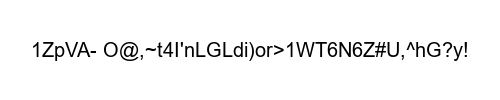

In [79]:
generate_GIF(text_list);